In [ ]:
!pip install pygmo
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.8 MB/s eta 0:00:00


In [ ]:
import pygmo
import numpy
import matplotlib.pyplot as plt
import pandas

In [ ]:
class Utility:
    eps = 0.001
    e = 10e-8

class TestFunction:
    def __init__(self, title: str, function_symbolic: str, area: list, bounds: numpy.ndarray, minima_analytical: numpy.ndarray, vector_initial: numpy.ndarray) -> None:
        self._title = title
        self._function_symbolic = function_symbolic
        self._function = None
        exec('self._function = lambda xy: ' + function_symbolic)
        self._function_symbolic = self._function_symbolic.replace('xy[0]', 'x').replace('xy[1]', 'y')
        self._area = area
        self._bounds=bounds
        self._minima = minima_analytical
        self._vector_initial=vector_initial
    @property
    def title(self):
        return self._title
    @property
    def function(self):
        return self._function
    @property
    def function_symbolic(self):
        return self._function_symbolic
    @property
    def area(self):
        return self._area
    @property
    def minima(self):
        return self._minima
    @property
    def vector_initial(self):
        return self._vector_initial
    @vector_initial.setter
    def vector_initial(self, value):
        self._vector_initial=value

    def generateMeshes(self):
        grid_x, grid_y = numpy.meshgrid(self._area[0], self._area[1])
        grid_z = self._function([grid_x, grid_y])
        return grid_x, grid_y, grid_z

    def fitness(self, x: numpy.ndarray):
        return [self._function(x)]
    def get_bounds(self):
        return self._bounds

In [ ]:
def optimise(test_function: TestFunction, algorithm, genes_count_max :int=100):
    population = pygmo.population(test_function, genes_count_max)
    fitnesses = []

    for i in range(genes_count_max):
        population = algorithm.evolve(population)
        fitnesses.append(population.get_f()[population.best_idx()])
    genes = numpy.linspace(0, genes_count_max, genes_count_max)

    return [genes, fitnesses]

def plotOptimisation(test_function: TestFunction, genes, fitnesses):
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes()
    ax.plot(genes, numpy.array(fitnesses), '-', marker='.', label="Чемпион")
    ax.plot(genes, numpy.full(len(genes), test_function.minima[2]), '--', lw=2, label="Глобальный минимум")
    ax.set_title(test_function.title)
    ax.set_xlabel("Generation")
    ax.set_ylabel("Fitness")
    ax.legend()

              Функция                              Алгоритм               Сходимость
0       Функция сферы              Simple Genetic Algorithm     [2.3318728139988125]
1       Функция сферы  Self-adaptive Differential Evolution  [5.980216690548497e-18]
2       Функция сферы           Particle Swarm Optimization    [0.06398037647808369]
3  Функция МакКормика              Simple Genetic Algorithm    [-1.7280260708782826]
4  Функция МакКормика  Self-adaptive Differential Evolution    [-1.9132229549810367]
5  Функция МакКормика           Particle Swarm Optimization    [-1.9050020565645136]


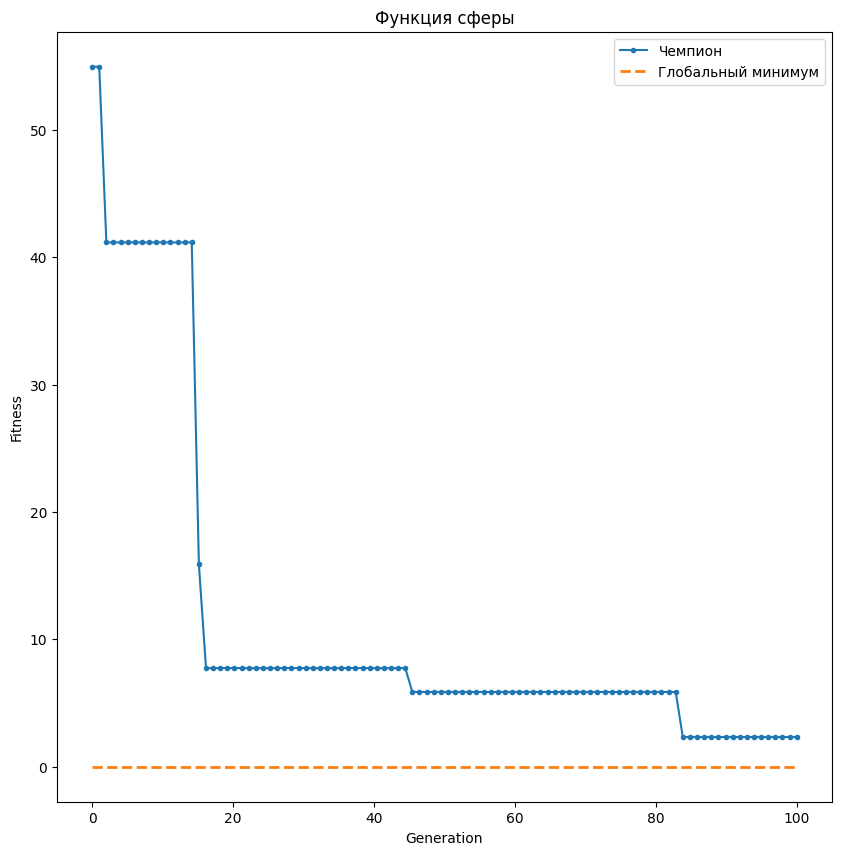

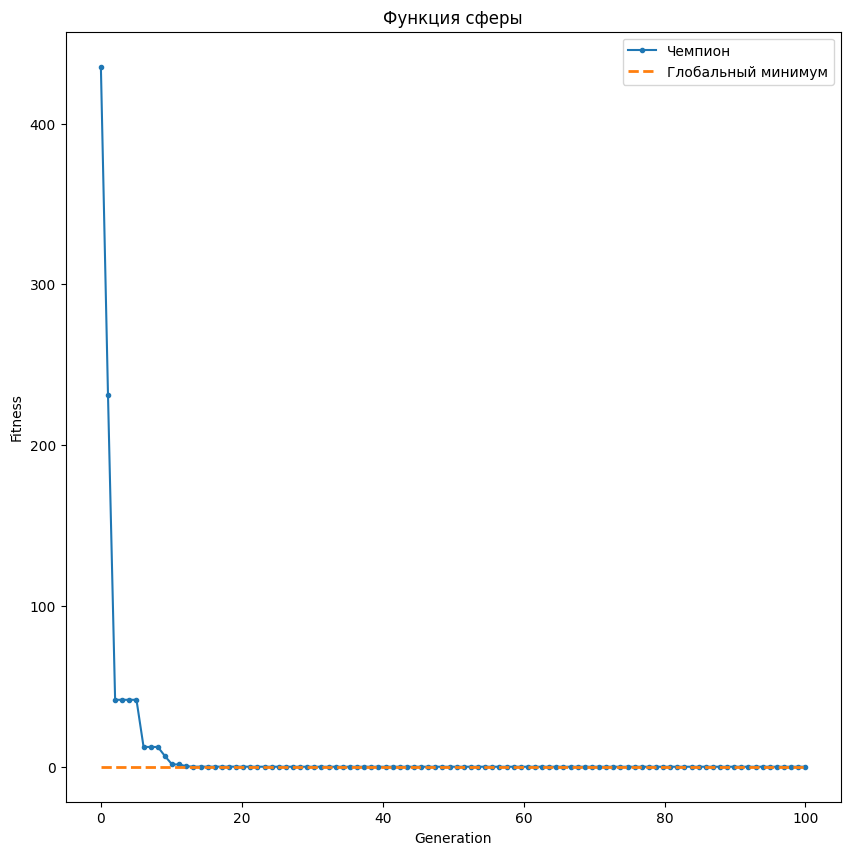

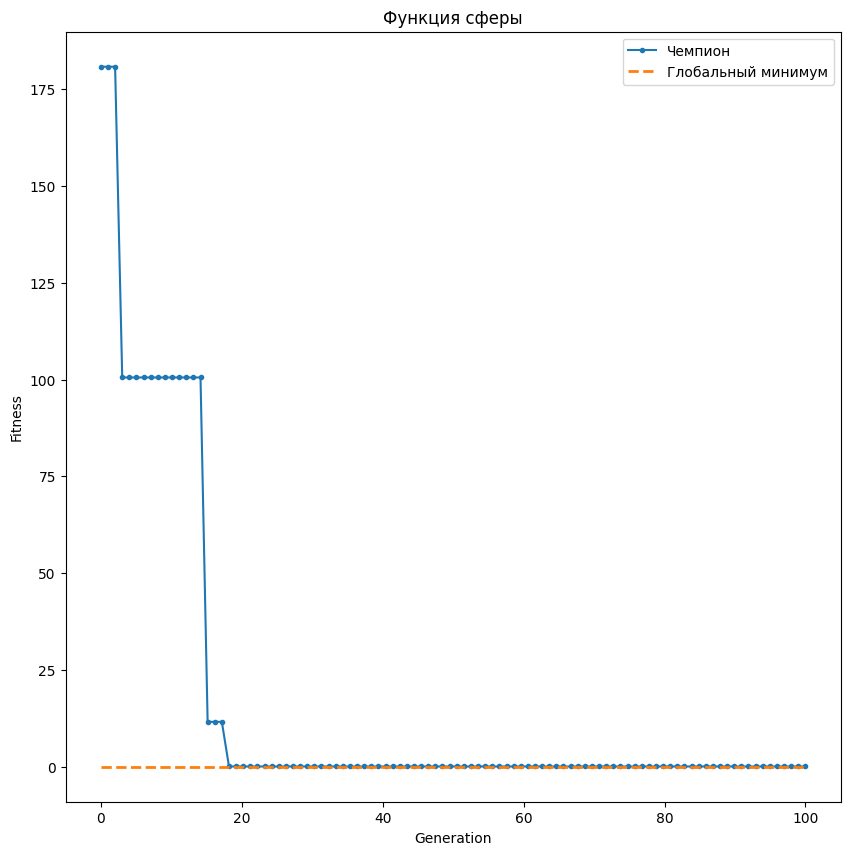

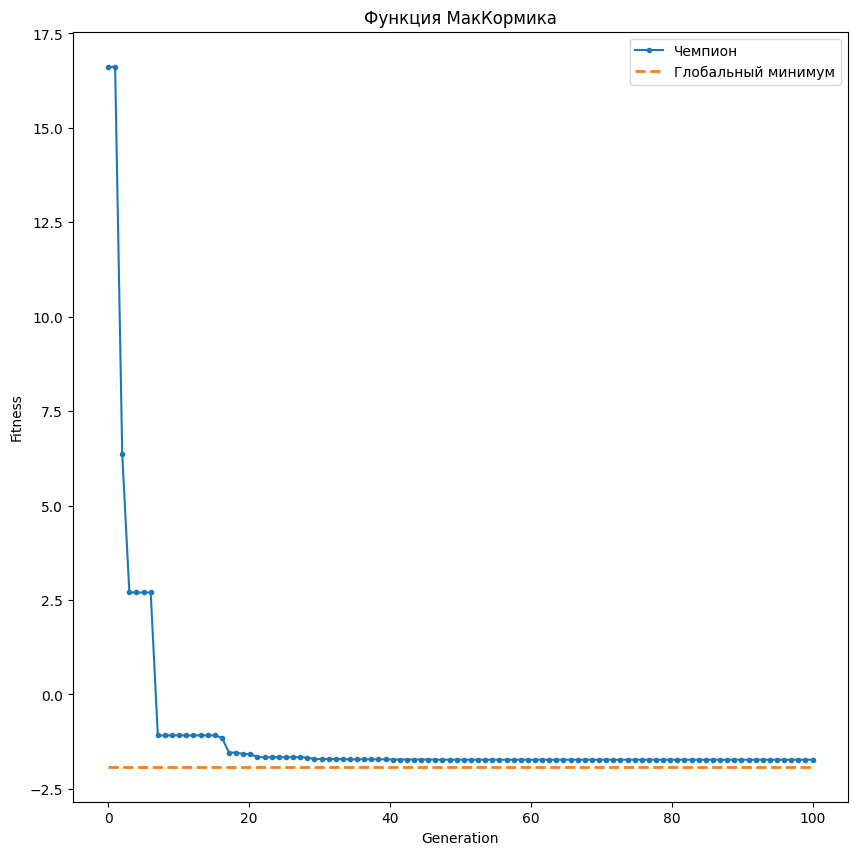

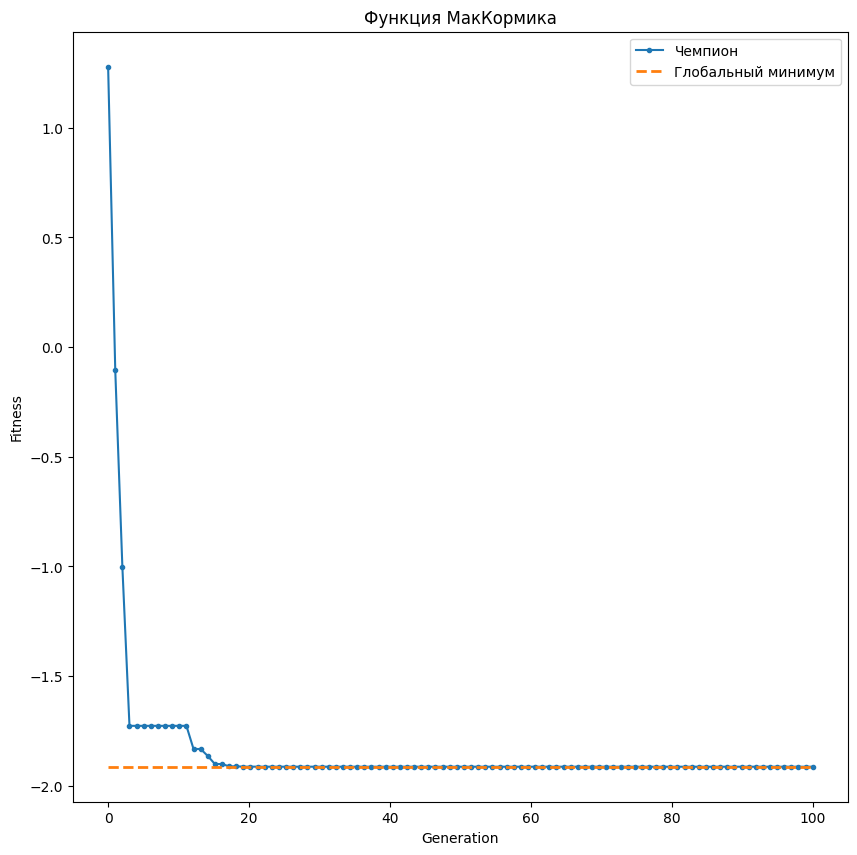

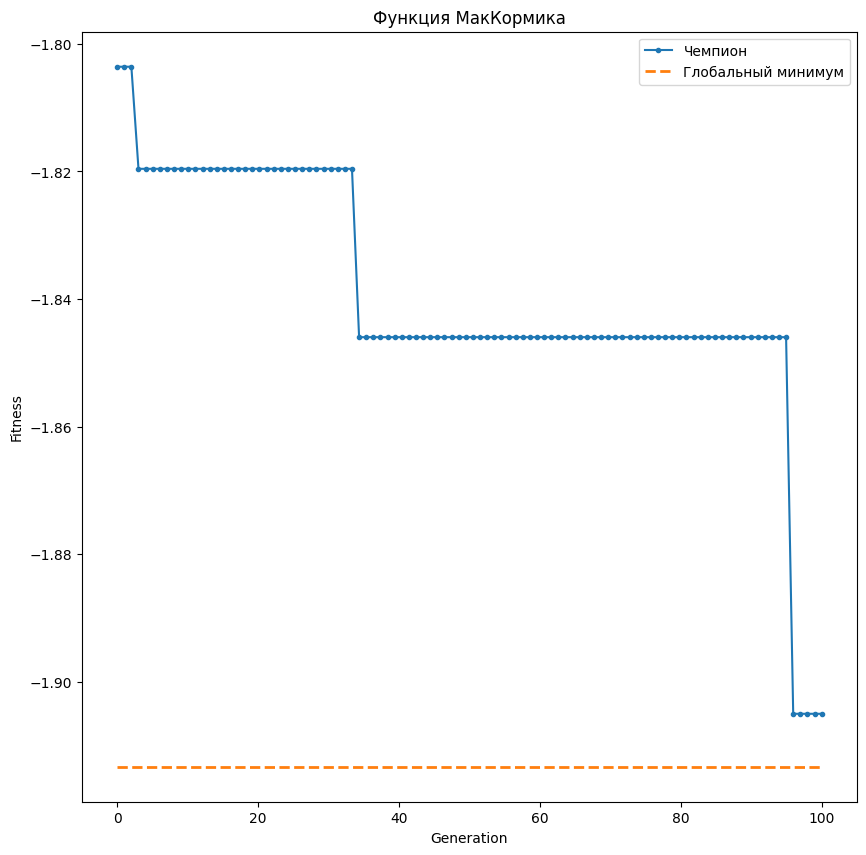

In [ ]:
test_functions=[TestFunction("Функция сферы", 'xy[0] ** 2 + xy[1] ** 2', [numpy.arange(-3, 3, 1), numpy.arange(-3, 3, 1)], numpy.array([[-300., -300.], [300., 300.]]), numpy.array([0, 0, 0]), numpy.array([2, 2.7])),
                TestFunction("Функция МакКормика", 'numpy.sin(xy[0] + xy[1]) + (xy[0] - xy[1]) ** 2 -1.5 * xy[0] + 2.5 * xy[1] + 1', [numpy.arange(-1.5, 4, 1), numpy.arange(-3, 4, 1)], numpy.array([[-2., -300.], [2., 300.]]), numpy.array([-0.54719, -1.54719, -1.9133]), numpy.array([1, -1]))]
algorithms=[('Simple Genetic Algorithm', pygmo.sga(1)), ('Self-adaptive Differential Evolution', pygmo.de1220(1)), ('Particle Swarm Optimization', pygmo.pso(1))]
results=[]

for test_function in test_functions:
    i=0
    for algorithm in algorithms:
        result=[test_function.title, algorithm[0]]
        data=optimise(test_function, pygmo.algorithm(algorithm[1]))
        result.append(data[1][-1])
        results.append(result)
        plotOptimisation(test_function, data[0], data[1])

numpy.warnings.filterwarnings('ignore', category=numpy.VisibleDeprecationWarning)
pandas.set_option('display.width', 200)
print(pandas.DataFrame(results, columns=['Функция', 'Алгоритм', 'Сходимость']))